In [46]:
using Distributions
using LinearAlgebra
using CSV
using Plots
include("./src/autoPic.jl")

autoClose (generic function with 4 methods)

In [23]:
trees_x = Array{Float64,1}()
trees_y = Array{Float64,1}()
grid_observed = zeros(Int8, 107, 107)
csvFile = CSV.read("./data_proj_414.csv")
treeFile = CSV.File("./trees.csv")
num_observed_grid = 0

0

In [24]:
farFile = CSV.read("far_map2.csv");
closeFile = CSV.read("close_map2.csv");

In [25]:
dndx = []
dndy = []
dndn = []
dnpx = []
dnpy = []
dnpn = []
for i = 1:107
    for j = 1:107
        if farFile[i,j] != -1
            push!(dndx, i)
            push!(dndy, j)
            push!(dndn, farFile[i,j])
        end
        if closeFile[i,j] != -1
            push!(dnpx, i)
            push!(dnpy, j)
            push!(dnpn, closeFile[i,j])
        end
    end
end         

In [26]:
# length(closeFile)

In [27]:
using DataFrames, CSV
function save_array(file_name, map_close)
    df_close = DataFrame(map_close)
    CSV.write(file_name, df_close, delim="\t")
end
    

save_array (generic function with 1 method)

In [28]:
dnd = DataFrame(X = dndx, Y = dndy, N = dndn);
dnp = DataFrame(X = dnpx, Y = dnpy, N = dnpn);

In [29]:
print(size(dnd),", ",size(dnp))

(4146, 3), (3252, 3)

In [30]:
save_array("./far_map_linear.csv", dnd)
save_array("./close_map_linear.csv", dnd)

"./close_map_linear.csv"

In [31]:
# dnp.N[1631]

In [32]:
dnp_N_max = findmax(dnp.N)[1]

402

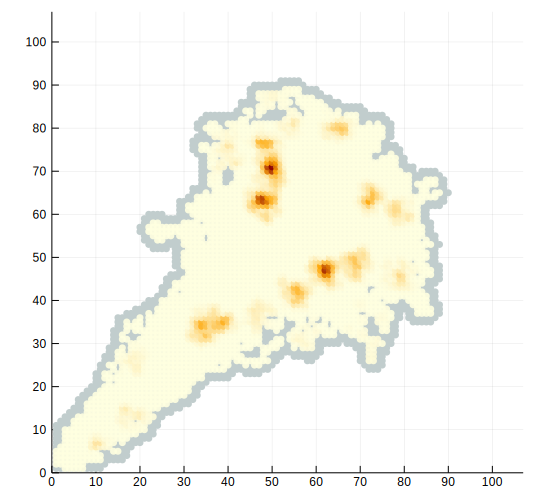

In [33]:
size_x = 5
pic = scatter(dnd.X,dnd.Y, size=(107*size_x,100*size_x),markerstrokewidth = 0, leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107, color = :azure3)

pic = scatter!(dnp.X,dnp.Y, size=(107*size_x,100*size_x),markerstrokewidth = 0, leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,zcolor=(dnp.N/dnp_N_max), m=(:heat, 0.9) )


In [34]:
function fix_pos(nx)
    if nx < 0 
        nx = -nx
    end
    return ceil(Int64, nx)
end

fix_pos (generic function with 1 method)

In [35]:
num_observed_grid = size(dnd,1)

4146

In [48]:
# treesFile = CSV.read("./trees.csv")
treesFile = CSV.read("./centers.csv")

num_observed_trees = size(treesFile,1)
trees_x = Array{Float64,1}()
trees_y = Array{Float64,1}()
for i in 1:num_observed_trees
    push!(trees_x, treesFile.X[i])
    push!(trees_y, treesFile.Y[i])
end

In [49]:
lambda_hat = num_observed_trees / num_observed_grid

grid_distribution = Poisson(lambda_hat)
print(lambda_hat,", ", num_observed_trees ,", ", num_observed_grid,", ", lambda_hat*107^2)

0.00482392667631452, 20, 4146, 55.22913651712494

In [50]:
org_x = deepcopy(trees_x)
org_y = deepcopy(trees_y)
sum_repeat = 0
for iter = 1:100
    global sum_repeat
    num_new_trees = 0
    for x = 1:107
        for y = 1:107
#             if grid_observed[x, y] == 0
            if farFile[x, y] == 0
                continue
            end
            if farFile[x, y] == -1
                r = rand()
                num_in_grid = 0
                while cdf(grid_distribution, num_in_grid) < r
                    num_in_grid = num_in_grid + 1
                end
                if iter == 1
                    for k = 1:num_in_grid
                        push!(org_x, x-rand())
                        push!(org_y, y-rand())
                    end
                end
                num_new_trees += num_in_grid
            end
        end
    end
    sum_repeat += num_new_trees
#     println(sum_repeat)
end

In [51]:
println("Jiuling in unobserved area: ", round(Int, sum_repeat/100))
println("Jiuling in observed area: ", num_observed_trees)
println("Total trees number in forest: ", round(Int, sum_repeat/100)+num_observed_trees)

Jiuling in unobserved area: 35
Jiuling in observed area: 20
Total trees number in forest: 55


24094 24094 24094 2409424094 24094 24094 24094

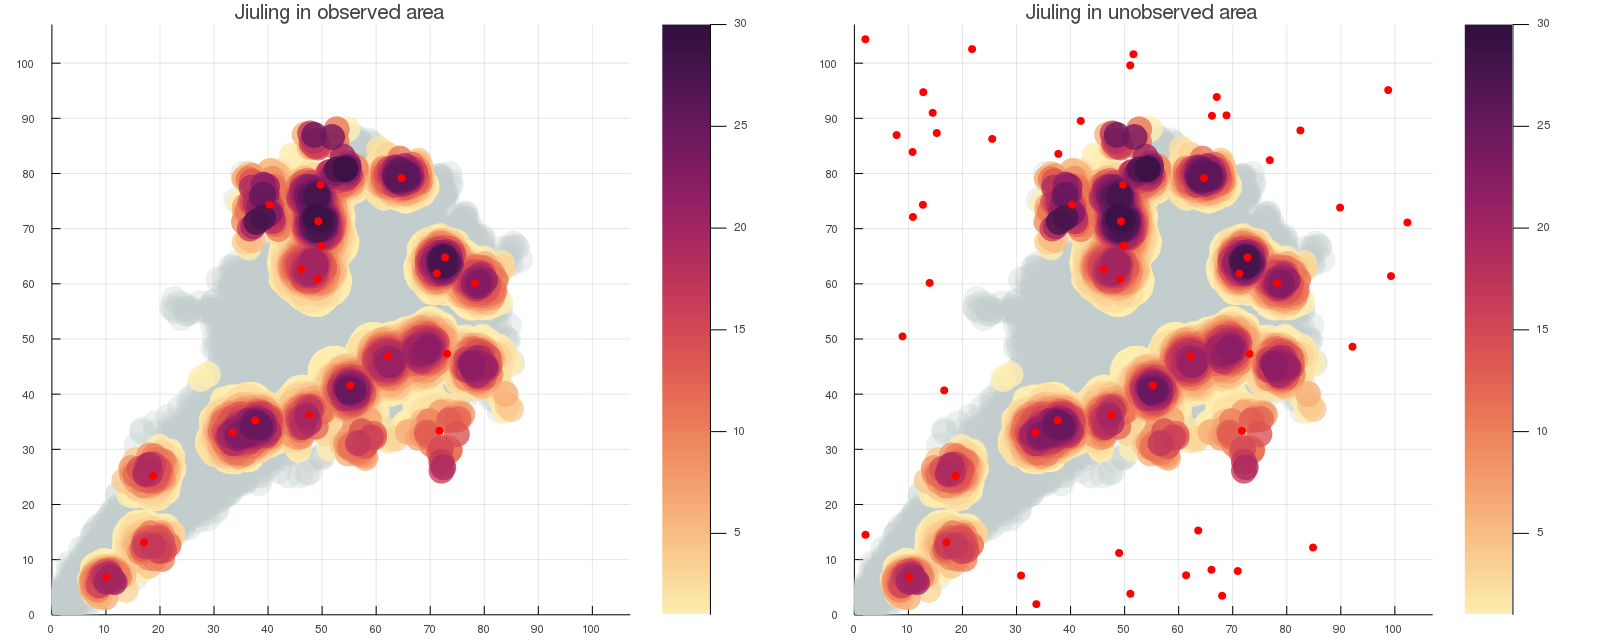

In [52]:
pw_far = autoFar("./data_proj_414.csv","Jiuling in observed area")
size_x = 5
pw_far = scatter!(trees_x, trees_y, markersize = 1*size_x, markerstrokewidth = 0,
            markercolor = :red, size=(107*size_x,107*size_x), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107)

pw_far2 = autoFar("./data_proj_414.csv","Jiuling in unobserved area")
size_x = 5
pw_far2 = scatter!(org_x, org_y, markersize = 1*size_x, markerstrokewidth = 0,
            markercolor = :red, size=(107*size_x,107*size_x), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107)

plot(pw_far, pw_far2,layout=(1,2), size=(107*15,107*6), fmt = :png)

In [53]:
savefig("pic/fig6.png")
savefig("pic/fig6.svg")

In [41]:
# load a couple of packages
# using Distributions

In [42]:
# cdf(Poisson(0.4), )